In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
a = -1
b = 1

def f(x):
    return math.sqrt(x + 1) - math.cos(x)

In [ ]:
def generate_points(m):
    x = np.linspace(a, b, m//3)
    epsilon = 0.25

    y = [f(x) for x in x]

    y_noise = []
    for i in range(m//3):
        y_noise.append(f(x[i]) + random.uniform((-1)*epsilon, epsilon))
        y_noise.append(f(x[i]) + random.uniform((-1)*epsilon, epsilon))
        y_noise.append(f(x[i]) + random.uniform((-1)*epsilon, epsilon))
    
    x_noise = [x[i//3] for i in range(len(x)*3)]
    #plt.figure(figsize=(20,10))
    #plt.plot(x, y_f, 'bo')
    #plt.plot(x_new, y, 'ro')
    return x, y, x_noise, y_noise

In [ ]:
def normal_equations(m, n, x, y):
    E = np.zeros((m, n + 1))
    for j in range(n + 1):
        E[:, j] = np.array([x[i]**j for i in range(m)])
    f_vector = y

    coef = np.linalg.solve(E.T@E, E.T@f_vector)
    return coef

In [ ]:
def get_poly_val(coef, x_input): # takes x and returns polynom value at this point
    degree = len(coef)
    poly = 0
    for k in range(degree):
        poly = poly + coef[k] * (x_input ** k)
    return poly

In [ ]:
def orthogonal_polynoms(m, n, x, y):
    polynoms = []
    polynoms.append([1])
    polynoms.append([(-1)/m * sum(x), 1])

    for j in range(1, n):
        alpha = sum([x[i] * (get_poly_val(polynoms[j], x[i]) ** 2) for i in range(m)]) / sum([(get_poly_val(polynoms[j], x[i]) ** 2) for i in range(m)])
        beta = sum([x[i] * get_poly_val(polynoms[j], x[i]) * get_poly_val(polynoms[j - 1], x[i]) for i in range(m)]) / sum([(get_poly_val(polynoms[j - 1], x[i]) ** 2) for i in range(m)])

        poly_1 = [0] + polynoms[j]
        poly_2 = [(-1) * alpha * coef for coef in polynoms[j]]
        poly_3 = [(-1) * beta * coef for coef in polynoms[j - 1]]

        new_poly = [poly_1[i] + poly_2[i] + poly_3[i] for i in range(len(poly_3))]
        new_poly.append(poly_2[-1] + poly_1[-2])
        new_poly.append(poly_1[-1])

        polynoms.append(new_poly)

    a = []
    for polynom in polynoms:
        a_k = sum([get_poly_val(polynom, x[i]) * y[i] for i in range(m)]) / sum([(get_poly_val(polynom, x[i]) ** 2) for i in range(m)])
        a.append(a_k)
        
    final_poly = [0] * (n + 1)
    for i in range(n + 1):
        for j in range(len(polynoms[i])):
            final_poly[j] += a[i] * polynoms[i][j]

    return final_poly


In [ ]:
m = 300 # Здесь и везде дальше нужно использовать m кратные 3, так как мы каждой точке сопоставляем 3 зашумленные точки.
x_true, y_true, x_noise, y_noise = generate_points(m)

n = 4
normal_coef = normal_equations(m, n, x_noise, y_noise)
orthogonal_coef = orthogonal_polynoms(m, n, x_noise, y_noise)

y_predicted_normal = [get_poly_val(normal_coef, x) for x in x_true]
y_predicted_orthogonal = [get_poly_val(orthogonal_coef, x) for x in x_true]

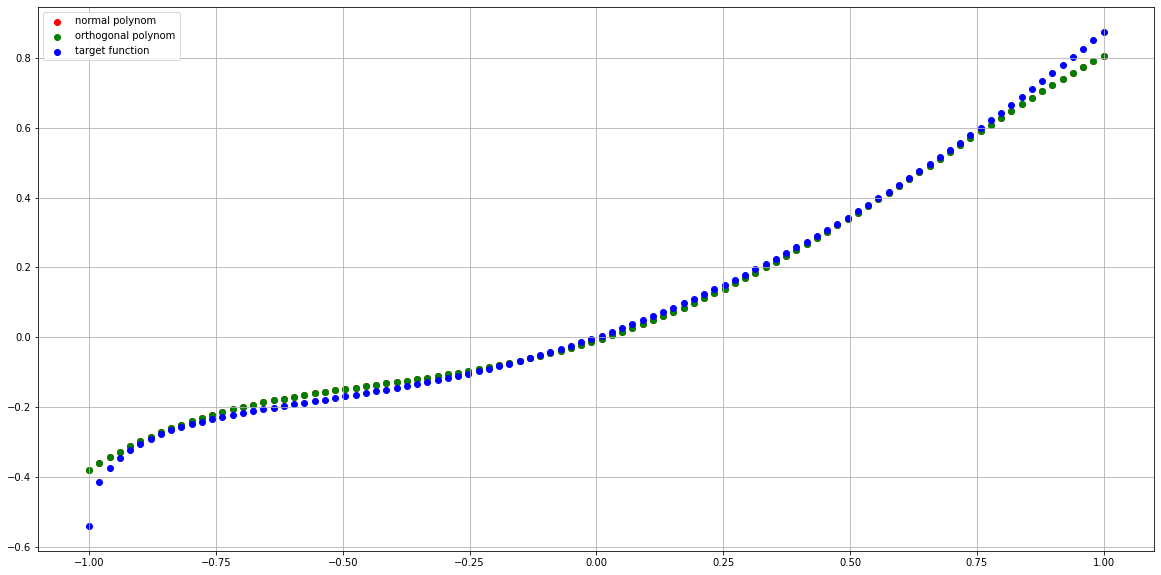

In [ ]:
plt.figure(figsize=(20,10))

plt.scatter(x_true, y_predicted_normal, color='red', label="normal polynom")
plt.scatter(x_true, y_predicted_orthogonal, color='green', label="orthogonal polynom")
plt.scatter(x_true, y_true, color='blue', label="target function")
plt.legend()
plt.grid()
#красный полином не виден, так как он совпадает с зеленым. Полиномы построенные обоими способами совпадают.

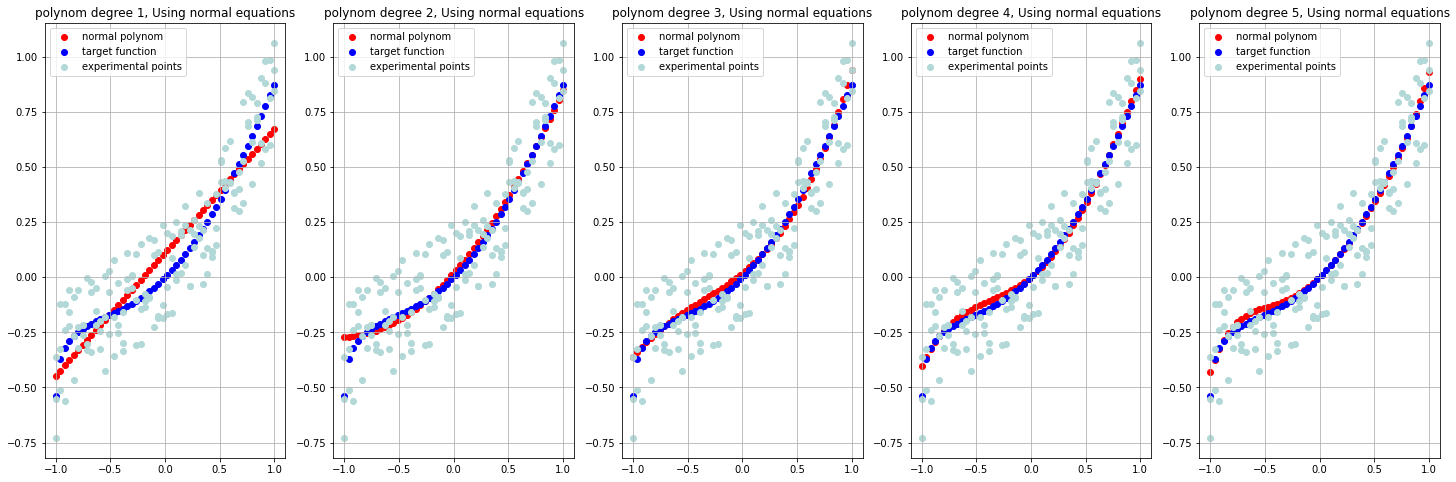

In [ ]:
list_n = [1, 2, 3, 4, 5]

m = 150
x_true, y_true, x_noise, y_noise = generate_points(m)

fig, axes = plt.subplots(1, len(list_n))
fig.set_size_inches(25, 8)

for i, n in enumerate(list_n):
    normal_coef = normal_equations(m, n, x_noise, y_noise)

    y_predicted_normal = [get_poly_val(normal_coef, x) for x in x_true]

    axes[i].scatter(x_true, y_predicted_normal, color='red', label="normal polynom")
    axes[i].scatter(x_true, y_true, color='blue', label="target function")
    axes[i].scatter(x_noise, y_noise, color='#b2d8d8', label="experimental points")
    axes[i].legend()
    axes[i].grid()
    axes[i].set_title('polynom degree {}, Using normal equations'.format(n))

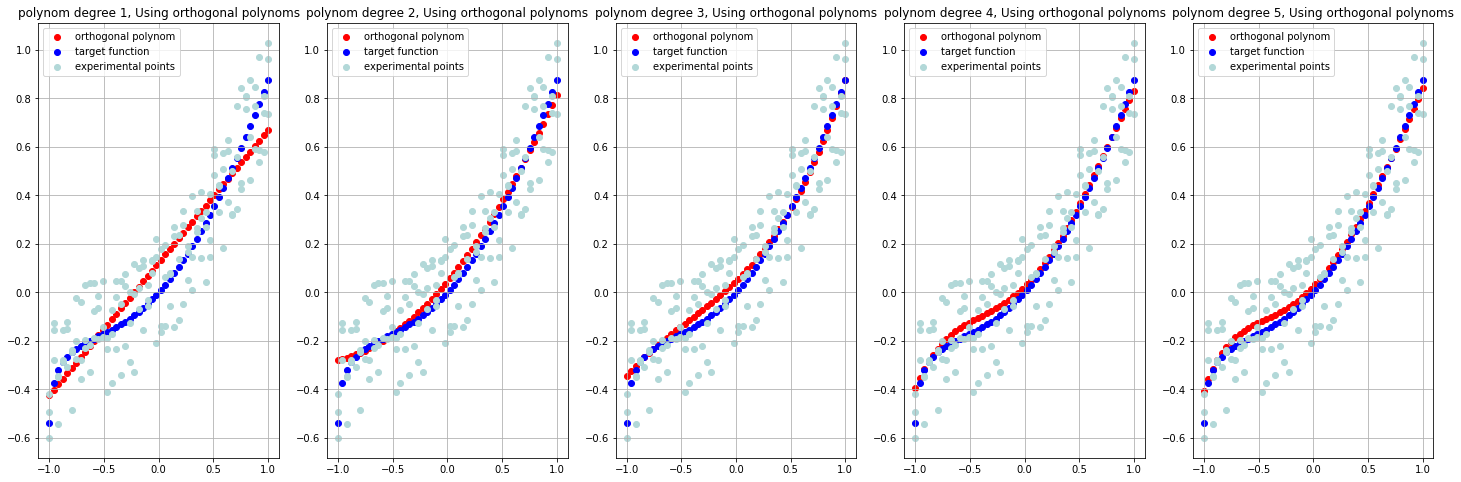

In [ ]:
list_n = [1, 2, 3, 4, 5]

m = 150
x_true, y_true, x_noise, y_noise = generate_points(m)

fig, axes = plt.subplots(1, len(list_n))
fig.set_size_inches(25, 8)

for i, n in enumerate(list_n):
    orthogonal_coef = orthogonal_polynoms(m, n, x_noise, y_noise)

    y_predicted_orthogonal = [get_poly_val(orthogonal_coef, x) for x in x_true]

    axes[i].scatter(x_true, y_predicted_orthogonal, color='red', label="orthogonal polynom")
    axes[i].scatter(x_true, y_true, color='blue', label="target function")
    axes[i].scatter(x_noise, y_noise, color='#b2d8d8', label="experimental points")
    axes[i].legend()
    axes[i].grid()
    axes[i].set_title('polynom degree {}, Using orthogonal polynoms'.format(n))

In [ ]:
def maximum_deviation_normal_equations(n):
    differences = []
    normal_coef = normal_equations(m, n, x_noise, y_noise)
    y_predicted_normal = [get_poly_val(normal_coef, x) for x in x_true]

    for i in range(len(x_true)):
        differences.append((y_predicted_normal[i] - y_true[i])**2)
    return sum(differences)

In [ ]:
def maximum_deviation_orthogonal_polynoms(n):
    differences = []
    orthogonal_coef = orthogonal_polynoms(m, n, x_noise, y_noise)
    y_predicted_orthogonal = [get_poly_val(orthogonal_coef, x) for x in x_true]

    for i in range(len(x_true)):
        differences.append((y_predicted_orthogonal[i] - y_true[i])**2)
    return sum(differences)

In [ ]:
import pandas as pd

deviation_normal = [maximum_deviation_normal_equations(n) for n in list_n]
deviation_orthogonal = [maximum_deviation_orthogonal_polynoms(n) for n in list_n]

df = pd.DataFrame(list(zip(list_n, deviation_normal, deviation_orthogonal)), 
                  columns=['степень полинома', 'Сумма квадратов ошибок для МНК (нормальные уравнения)', 'Сумма квадратов ошибок для МНК (ортогональные полиномы)'])
df

,степень полинома,Сумма квадратов ошибок для МНК (нормальные уравнения),Сумма квадратов ошибок для МНК (ортогональные полиномы)
0,1,0.410180,0.410180
1,2,0.129110,0.129110
2,3,0.082622,0.082622
3,4,0.059664,0.059664
4,5,0.054156,0.054156
